In [4]:
from scipy.stats import friedmanchisquare, mannwhitneyu, wilcoxon, ks_2samp, sem, t
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('../data/us_covid19_daily.csv')
df['deathIncrease'] = df['deathIncrease'].astype(int)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['unixTime'] = df['date'].astype(int) / 10**9
df = df[['unixTime', 'deathIncrease']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
covid = pd.DataFrame(foo)

df = pd.read_csv('../data/Bike-Sharing-Dataset/day.csv')
df = df[['temp', 'cnt']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
bike = pd.DataFrame(foo)

df = pd.read_csv('../data/pw_data3_1000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
synthetic_500 = pd.DataFrame(foo)

df = pd.read_csv('../data/pw_data3_5000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
synthetic_5k = pd.DataFrame(foo)

datasets = [
    {'name' : 'Covid', 'data': covid},
    {'name' : 'Bike', 'data': bike},
    {'name' : 'Synthetic_500', 'data': synthetic_500},
    {'name' : 'Synthetic_5k', 'data': synthetic_5k}
]

# Genetic Comp

In [38]:
col_names = ('Nelder-Mead', 'SLSQP', 'Diff Ev', 'PSO')
for dataset in datasets:
    df = pd.read_csv(f"../data/results/genetic_comp_{dataset['name']}_all.csv")

    variable = 'test-rmse'

    nelder = df[df['method']=='Nelder-Mead'][variable]
    slsqp  = df[df['method']=='SLSQP'][variable]
    pso    = df[df['method']=='pso'][variable]
    diffev = df[df['method']=='diffev'][variable]
    all_methods = [
        { 'name' : 'nelder', 'data' : nelder },
        { 'name' : 'slsqp', 'data': slsqp },
        { 'name' : 'pso', 'data': pso },
        { 'name' : 'diffev', 'data' : diffev},
    ]

    p_val = np.zeros((len(all_methods), len(all_methods)), np.float64)
    statistic = np.zeros((len(all_methods), len(all_methods)), np.float64)
    for i in range(len(all_methods)):
        for j in range(len(all_methods)):
            if i != j:
                stat, p = wilcoxon(all_methods[i]['data'], all_methods[j]['data'])
                p_val[i][j] = p
                statistic[i][j] = stat
            else:
                p_val[i][j] = np.nan
                statistic[i][j] = np.nan

    print(pd.DataFrame(p_val, columns=col_names, index=col_names).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &   Nelder-Mead &         SLSQP &       Diff Ev &           PSO \\
\midrule
Nelder-Mead &           NaN &  9.460594e-07 &  7.006286e-15 &  6.848674e-16 \\
SLSQP       &  9.460594e-07 &           NaN &  5.596248e-18 &  4.670683e-18 \\
Diff Ev     &  7.006286e-15 &  5.596248e-18 &           NaN &  4.873426e-01 \\
PSO         &  6.848674e-16 &  4.670683e-18 &  4.873426e-01 &           NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
{} &  Nelder-Mead &         SLSQP &       Diff Ev &       PSO \\
\midrule
Nelder-Mead &          NaN &  1.162688e-01 &  8.758412e-06 &  0.000821 \\
SLSQP       &     0.116269 &           NaN &  2.081918e-07 &  0.000017 \\
Diff Ev     &     0.000009 &  2.081918e-07 &           NaN &  0.108340 \\
PSO         &     0.000821 &  1.671497e-05 &  1.083403e-01 &       NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
{} &   Nelder-Mead &         SLSQP &       Diff Ev &           PSO \\
\midrule
Nelder

# Linear Comparison

In [37]:
col_names = ('Minimize', 'OLS')
for dataset in datasets:
    df = pd.read_csv(f"../data/results/lin_comp_{dataset['name']}_all.csv")

    variable = 'rmse'

    minimize = df[df['method']=='Minimize'][variable]
    ols  = df[df['method']=='OLS'][variable]

    all_methods = [
        { 'name' : 'Minimize', 'data' : minimize },
        { 'name' : 'OLS', 'data': ols }
    ]

    p_val = np.zeros((len(all_methods), len(all_methods)), np.float64)
    statistic = np.zeros((len(all_methods), len(all_methods)), np.float64)
    for i in range(len(all_methods)):
        for j in range(len(all_methods)):
            if i != j:
                stat, p = wilcoxon(all_methods[i]['data'], all_methods[j]['data'])
                p_val[i][j] = p
                statistic[i][j] = stat
            else:
                p_val[i][j] = np.nan
                statistic[i][j] = np.nan

    print(pd.DataFrame(p_val, columns=col_names, index=col_names).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Minimize &       OLS \\
\midrule
Minimize &       NaN &  0.697623 \\
OLS      &  0.697623 &       NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &  Minimize &       OLS \\
\midrule
Minimize &       NaN &  0.520246 \\
OLS      &  0.520246 &       NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &  Minimize &       OLS \\
\midrule
Minimize &       NaN &  0.863503 \\
OLS      &  0.863503 &       NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &  Minimize &       OLS \\
\midrule
Minimize &       NaN &  0.386239 \\
OLS      &  0.386239 &       NaN \\
\bottomrule
\end{tabular}



# Max Comparison

Alpha 1e-8

In [41]:
col_names = ('Max', 'SofterMax')
for dataset in datasets:
    df = pd.read_csv(f"../data/results/max_comp_{dataset['name']}_alpha1e-8_all.csv")

    variable = 'test-rmse'

    max_ = df[df['max']==True][variable]
    softerMax  = df[df['max']==False][variable]

    all_methods = [
        { 'name' : 'Max', 'data' : max_ },
        { 'name' : 'SofterMax', 'data': softerMax }
    ]

    p_val = np.zeros((len(all_methods), len(all_methods)), np.float64)
    statistic = np.zeros((len(all_methods), len(all_methods)), np.float64)
    for i in range(len(all_methods)):
        for j in range(len(all_methods)):
            if i != j:
                stat, p = wilcoxon(all_methods[i]['data'], all_methods[j]['data'])
                p_val[i][j] = p
                statistic[i][j] = stat
            else:
                p_val[i][j] = np.nan
                statistic[i][j] = np.nan

    print(pd.DataFrame(p_val, columns=col_names, index=col_names).to_latex())

\begin{tabular}{lrr}
\toprule
{} &       Max &  SofterMax \\
\midrule
Max       &       NaN &   0.285049 \\
SofterMax &  0.285049 &        NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &       Max &  SofterMax \\
\midrule
Max       &       NaN &   0.463071 \\
SofterMax &  0.463071 &        NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &       Max &  SofterMax \\
\midrule
Max       &       NaN &   0.262618 \\
SofterMax &  0.262618 &        NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &       Max &  SofterMax \\
\midrule
Max       &       NaN &   0.285049 \\
SofterMax &  0.285049 &        NaN \\
\bottomrule
\end{tabular}



## Alpha 5e-3

In [42]:
col_names = ('Max', 'SofterMax')
for dataset in datasets:
    df = pd.read_csv(f"../data/results/max_comp_{dataset['name']}_alpha5e-3_all.csv")

    variable = 'test-rmse'

    max_ = df[df['max']==True][variable]
    softerMax  = df[df['max']==False][variable]

    all_methods = [
        { 'name' : 'Max', 'data' : max_ },
        { 'name' : 'SofterMax', 'data': softerMax }
    ]

    p_val = np.zeros((len(all_methods), len(all_methods)), np.float64)
    statistic = np.zeros((len(all_methods), len(all_methods)), np.float64)
    for i in range(len(all_methods)):
        for j in range(len(all_methods)):
            if i != j:
                stat, p = wilcoxon(all_methods[i]['data'], all_methods[j]['data'])
                p_val[i][j] = p
                statistic[i][j] = stat
            else:
                p_val[i][j] = np.nan
                statistic[i][j] = np.nan

    print(pd.DataFrame(p_val, columns=col_names, index=col_names).to_latex())

\begin{tabular}{lrr}
\toprule
{} &       Max &  SofterMax \\
\midrule
Max       &       NaN &   0.058526 \\
SofterMax &  0.058526 &        NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &       Max &  SofterMax \\
\midrule
Max       &       NaN &   0.446913 \\
SofterMax &  0.446913 &        NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &       Max &  SofterMax \\
\midrule
Max       &       NaN &   0.167966 \\
SofterMax &  0.167966 &        NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &       Max &  SofterMax \\
\midrule
Max       &       NaN &   0.707826 \\
SofterMax &  0.707826 &        NaN \\
\bottomrule
\end{tabular}



# Model Comparison

In [44]:
col_names = ('Knotilus', 'GAM', 'MARS')
for dataset in datasets:
    df = pd.read_csv(f"../data/results/model_comp_{dataset['name']}_all.csv")

    variable = 'test-rmse'

    knotilus = df[df['method']=='Knotilus'][variable]
    gam  = df[df['method']=='GAM'][variable]
    mars  = df[df['method']=='MARS'][variable]

    all_methods = [
        { 'name' : 'Minimize', 'data' : minimize },
        { 'name' : 'GAM', 'data': gam },
        { 'name' : 'MARS', 'data': mars }
    ]

    p_val = np.zeros((len(all_methods), len(all_methods)), np.float64)
    statistic = np.zeros((len(all_methods), len(all_methods)), np.float64)
    for i in range(len(all_methods)):
        for j in range(len(all_methods)):
            if i != j:
                stat, p = wilcoxon(all_methods[i]['data'], all_methods[j]['data'])
                p_val[i][j] = p
                statistic[i][j] = stat
            else:
                p_val[i][j] = np.nan
                statistic[i][j] = np.nan

    print(pd.DataFrame(p_val, columns=col_names, index=col_names).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &      Knotilus &           GAM &          MARS \\
\midrule
Knotilus &           NaN &  3.896560e-18 &  4.016156e-18 \\
GAM      &  3.896560e-18 &           NaN &  5.164213e-16 \\
MARS     &  4.016156e-18 &  5.164213e-16 &           NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &      Knotilus &           GAM &          MARS \\
\midrule
Knotilus &           NaN &  3.896560e-18 &  3.896560e-18 \\
GAM      &  3.896560e-18 &           NaN &  8.962418e-08 \\
MARS     &  3.896560e-18 &  8.962418e-08 &           NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &      Knotilus &           GAM &          MARS \\
\midrule
Knotilus &           NaN &  3.896560e-18 &  3.896560e-18 \\
GAM      &  3.896560e-18 &           NaN &  1.235866e-09 \\
MARS     &  3.896560e-18 &  1.235866e-09 &           NaN \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &      Knotilus &           GAM &          MARS \\
\midrule
Kno

# Other Tests

In [3]:
df = pd.read_csv('../data/genetic_bootstrap_bike.csv')
df.head()

iteration       method  test-rmse      rmse  numKnots  \
0          0  Nelder-Mead   0.163326  0.162241         6   
1          0        SLSQP   0.164770  0.163261         3   
2          0          pso   0.162418  0.161402         8   
3          0       diffev   0.165224  0.163045         6   
4          1  Nelder-Mead   0.162411  0.162803         5   

                                             knotLoc  iterations       time  
0  [0.36179434 0.4430802  0.61665217 0.34722957 0...         599   2.853616  
1                 [0.61677027 0.74531449 0.11419772]          35   0.161423  
2  [0.63984732 0.38951372 0.3633344  0.91789464 0...        1002  11.889218  
3  [0.77761479 0.74533665 0.78243251 0.36394469 0...        2771   6.693882  
4  [0.69435352 0.04304443 0.69155052 0.95820472 0...         301   1.327671

In [16]:
data1 = df[df['method']=='Nelder-Mead']['test-rmse']
data2 = df[df['method']=='SLSQP']['test-rmse']
data3 = df[df['method']=='pso']['test-rmse']
data4 = df[df['method']=='diffev']['test-rmse']
# compare samples
stat, p = friedmanchisquare(data1, data2, data3, data4)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    p_val = np.zeros((len(all_methods), len(all_methods)), np.float64)
    statistic  = np.zeros((len(all_methods), len(all_methods)), np.float64)
    
for i in range(len(all_methods)):
    for j in range(len(all_methods)):
        stat, p = ks_2samp(all_methods[i]['data'], all_methods[j]['data'])
        p_val[i][j] = p
        statistic[i][j] = stat
    print('Different distributions (reject H0)')

Statistics=95.172, p=0.000
Different distributions (reject H0)
Different distributions (reject H0)
Different distributions (reject H0)
Different distributions (reject H0)


In [17]:
variable = 'test-rmse'

nelder = df[df['method']=='Nelder-Mead'][variable]
slsqp  = df[df['method']=='SLSQP'][variable]
pso    = df[df['method']=='pso'][variable]
diffev = df[df['method']=='diffev'][variable]
all_methods = [
    { 'name' : 'nelder', 'data' : nelder },
    { 'name' : 'slsqp', 'data': slsqp },
    { 'name' : 'pso', 'data': pso },
    { 'name' : 'diffev', 'data' : diffev},
]

Verify that the data is not normally distributed

## Pairwise Wilcoxon signed-rank test

In [20]:
for i in range(len(all_methods)):
    for j in range(i+1, len(all_methods)):
        print('\nTesting method', all_methods[i]['name'], 'and', all_methods[j]['name'])
        stat, p = wilcoxon(all_methods[i]['data'], all_methods[j]['data'])
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')


Testing method nelder and slsqp
Statistics=516.000, p=0.000
Different distribution (reject H0)

Testing method nelder and pso
Statistics=1303.000, p=0.000
Different distribution (reject H0)

Testing method nelder and diffev
Statistics=1020.000, p=0.000
Different distribution (reject H0)

Testing method slsqp and pso
Statistics=166.000, p=0.000
Different distribution (reject H0)

Testing method slsqp and diffev
Statistics=164.000, p=0.000
Different distribution (reject H0)

Testing method pso and diffev
Statistics=1268.000, p=0.000
Different distribution (reject H0)


In [27]:
col_names = ('Nelder-Mead', 'SLSQP', 'Diff Ev', 'PSO')

p_val = np.zeros((len(all_methods), len(all_methods)), np.float64)
statistic = np.zeros((len(all_methods), len(all_methods)), np.float64)
for i in range(len(all_methods)):
    for j in range(len(all_methods)):
        if i != j:
            stat, p = wilcoxon(all_methods[i]['data'], all_methods[j]['data'])
            p_val[i][j] = p
            statistic[i][j] = stat
        else:
            p_val[i][j] = np.nan
            statistic[i][j] = np.nan

print(pd.DataFrame(p_val, columns=col_names, index=col_names))

              Nelder-Mead         SLSQP       Diff Ev           PSO
Nelder-Mead           NaN  4.929402e-12  2.649965e-05  2.283033e-07
SLSQP        4.929402e-12           NaN  5.020142e-16  4.743781e-16
Diff Ev      2.649965e-05  5.020142e-16           NaN  1.546392e-05
PSO          2.283033e-07  4.743781e-16  1.546392e-05           NaN


In [25]:
pd.DataFrame(p_val, columns=col_names, index=col_names)

Nelder-Mead         SLSQP       Diff Ev           PSO
Nelder-Mead           NaN  4.929402e-12  2.649965e-05  2.283033e-07
SLSQP        4.929402e-12           NaN  5.020142e-16  4.743781e-16
Diff Ev      2.649965e-05  5.020142e-16           NaN  1.546392e-05
PSO          2.283033e-07  4.743781e-16  1.546392e-05           NaN

In [75]:
pd.DataFrame(statistic, columns=col_names, index=col_names)

Nelder-Mead   SLSQP  Diff Ev     PSO
Nelder-Mead          NaN  1907.0    706.0  2041.0
SLSQP             1907.0     NaN    635.0  1452.0
Diff Ev            706.0   635.0      NaN  1094.0
PSO               2041.0  1452.0   1094.0     NaN

## Pairwise Kolmogorov-Smirnov Statistic

In [41]:
for i in range(len(all_methods)):
    for j in range(i+1, len(all_methods)):
        print('\nTesting method', all_methods[i]['name'], 'and', all_methods[j]['name'])
        stat, p = ks_2samp(all_methods[i]['data'], all_methods[j]['data'])
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)')


Testing method nelder and slsqp
Statistics=0.140, p=0.282
Same distribution (fail to reject H0)

Testing method nelder and pso
Statistics=0.220, p=0.016
Different distribution (reject H0)

Testing method nelder and diffev
Statistics=0.100, p=0.702
Same distribution (fail to reject H0)

Testing method slsqp and pso
Statistics=0.240, p=0.006
Different distribution (reject H0)

Testing method slsqp and diffev
Statistics=0.160, p=0.155
Same distribution (fail to reject H0)

Testing method pso and diffev
Statistics=0.210, p=0.024
Different distribution (reject H0)


In [58]:
p_val = np.zeros((len(all_methods), len(all_methods)), np.float64)
statistic  = np.zeros((len(all_methods), len(all_methods)), np.float64)
for i in range(len(all_methods)):
    for j in range(len(all_methods)):slsqp
        stat, p = ks_2samp(all_methods[i]['data''test-rmse'], all_methods[j]['data'])
        p_val[i][j] = p
        statistic[i][j] = stat

In [62]:
col_names = ('Nelder-Mead', 'SLSQP', 'Diff Ev', 'PSO')

In [70]:
pd.DataFrame(p_val, columns=col_names, index=col_names)

Nelder-Mead     SLSQP   Diff Ev       PSO
Nelder-Mead     1.000000  0.281942  0.015577  0.702057
SLSQP           0.281942  1.000000  0.006134  0.154839
Diff Ev         0.015577  0.006134  1.000000  0.024056
PSO             0.702057  0.154839  0.024056  1.000000

In [71]:
pd.DataFrame(statistic, columns=col_names, index=col_names)

Nelder-Mead  SLSQP  Diff Ev   PSO
Nelder-Mead         0.00   0.14     0.22  0.10
SLSQP               0.14   0.00     0.24  0.16
Diff Ev             0.22   0.24     0.00  0.21
PSO                 0.10   0.16     0.21  0.00

## Confidence Intervals

In [124]:
def mean_confidence_interval(data, confidence=0.95):
    n = data.shape[0]
    x_bar = np.mean(data)
    standard_error = sem(data)
    h = standard_error * t.ppf((1 + confidence) / 2., n-1)

    return x_bar, x_bar-h, x_bar+h, h

intervals = []
intervals.append(mean_confidence_interval(nelder))
intervals.append(mean_confidence_interval(slsqp))
intervals.append(mean_confidence_interval(diffev))
intervals.append(mean_confidence_interval(pso))

df_conf = pd.DataFrame(intervals, columns=('Mean', 'Lower', 'Upper', 'Interval'), index=col_names)
df_conf

Mean     Lower     Upper  Interval
Nelder-Mead  0.163308  0.162781  0.163835  0.000527
SLSQP        0.163905  0.163210  0.164601  0.000695
Diff Ev      0.162308  0.162178  0.162438  0.000130
PSO          0.161854  0.161697  0.162011  0.000157

[]

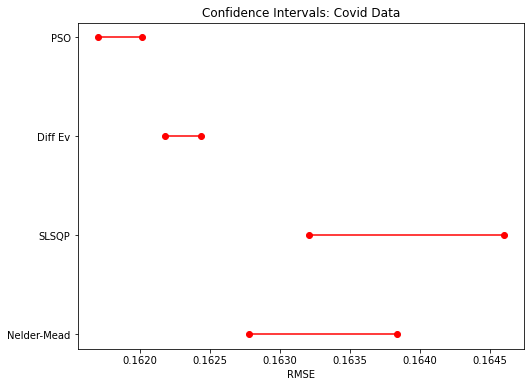

In [125]:
fig, ax = plt.subplots(figsize=(8,6))
for lower,upper,y in zip(df_conf['Lower'],df_conf['Upper'],range(len(df_conf))):
    plt.plot((lower,upper),(y,y),'ro-')
plt.yticks(range(len(df_conf)),list(df_conf.index))
plt.title('Confidence Intervals: Covid Data')
plt.xlabel('RMSE')
plt.savefig('../visualizations/genetic_confidence_covid.png', facecolor='white', transparent=False)
plt.plot()